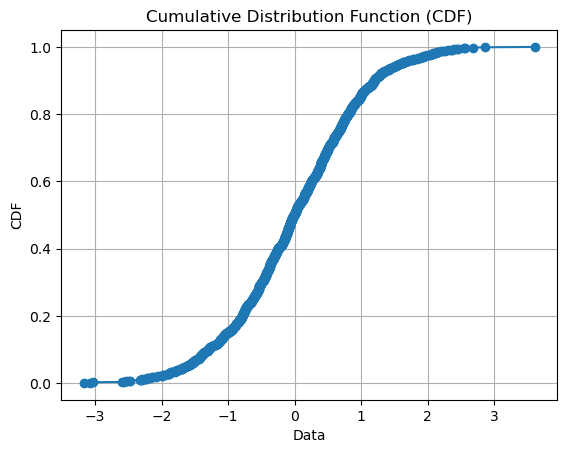

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data
data = np.random.normal(0, 1, 1000)

# Calculate the CDF
data_sorted = np.sort(data)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

# Plot the CDF
plt.plot(data_sorted, cdf, marker='o')
plt.xlabel('Data')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF)')
plt.grid(True)
plt.show()


In [6]:
import pandas as pd

# Read Excel data into a DataFrame
data = pd.read_excel(r'C:\Users\Jan Tinio\Desktop\Sample1.xlsx')

print(data.head())  # Display the first few rows of the DataFrame

      Sample
0  10.558393
1   8.717367
2   7.460083
3   8.025209
4   7.266863


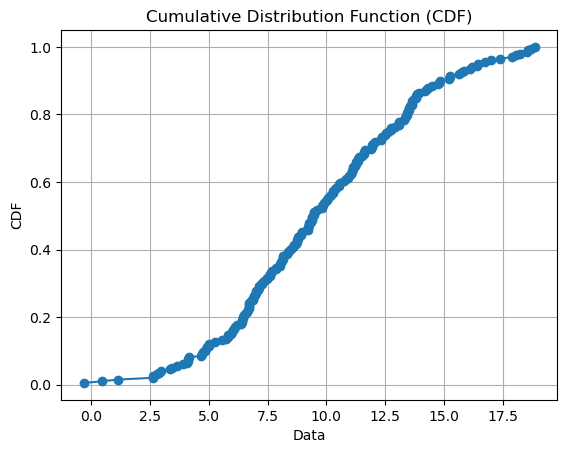

In [11]:
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel(r'C:\Users\Jan Tinio\Desktop\Sample1.xlsx')

# Calculate the CDF
data_sorted = np.sort(data)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

# Plot the CDF
plt.plot(data_sorted, cdf, marker='o')
plt.xlabel('Data')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF)')
plt.grid(True)
plt.show()


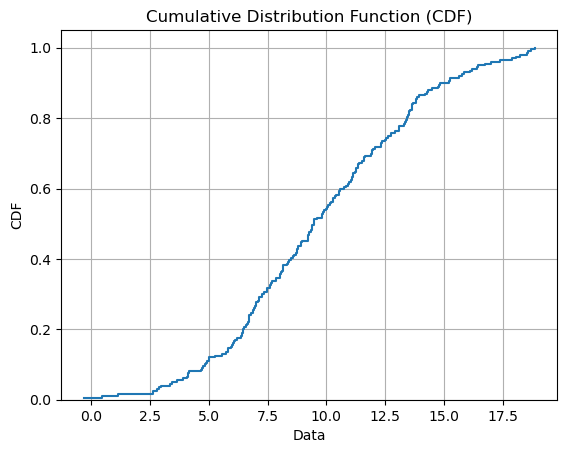

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Your dataset (replace this with your actual data)
data = pd.read_excel(r'C:\Users\Jan Tinio\Desktop\Sample1.xlsx')

# Sort the data
data_sorted = np.sort(data)

# Calculate the CDF
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

# Plot the CDF
plt.step(data_sorted, cdf, where='post')
plt.xlabel('Data')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF)')
plt.ylim([0, 1.05])
plt.grid(True)
plt.show()


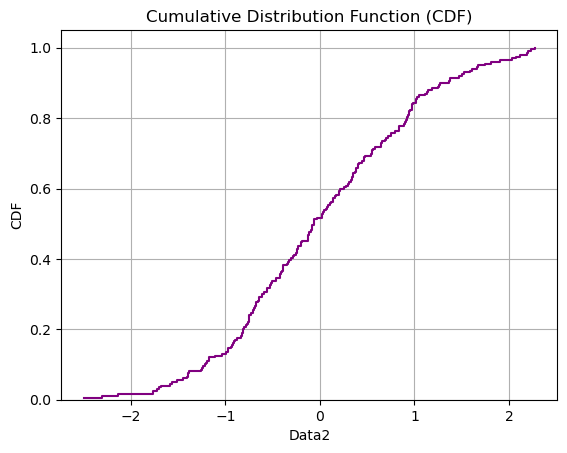

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Your dataset (replace this with your actual data)
data2 = pd.read_excel(r'C:\Users\Jan Tinio\Desktop\Sample1_standardized.xlsx')

# Sort the data
data_sorted2 = np.sort(data2)

# Calculate the CDF
cdf = np.arange(1, len(data_sorted2) + 1) / len(data_sorted2)

# Plot the CDF
plt.step(data_sorted2, cdf, where='post', color='purple')
plt.xlabel('Data2')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF)')
plt.ylim([0, 1.05])
plt.grid(True)
plt.show()

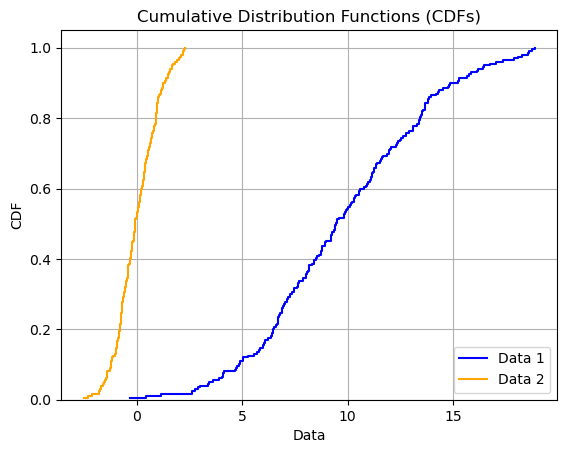

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Generate two sets of random data
data1 = pd.read_excel(r'C:\Users\Jan Tinio\Desktop\Sample1.xlsx')
data2 = pd.read_excel(r'C:\Users\Jan Tinio\Desktop\Sample1_standardized.xlsx')

# Sort the data
data1_sorted = np.sort(data1)
data2_sorted = np.sort(data2)

# Calculate the CDFs
cdf1 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)
cdf2 = np.arange(1, len(data2_sorted) + 1) / len(data2_sorted)

# Plot the CDFs
plt.step(data1_sorted, cdf1, where='post', label='Data 1', color='blue')
plt.step(data2_sorted, cdf2, where='post', label='Data 2', color='orange')
plt.xlabel('Data')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Functions (CDFs)')
plt.ylim([0, 1.05])
plt.legend()
plt.grid(True)
plt.show()


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Simulate locally stationary data with non-stationary intervals
t = np.linspace(0, 10, 100)
data = np.sin(t) + np.random.normal(0, 0.1, t.shape[0])
data[40:60] += np.linspace(0, 2, 20)  # Non-stationary interval

# Identify non-stationary interval
non_stationary_indices = np.arange(40, 60)

# Apply differencing within non-stationary interval
stationary_data = data.copy()
stationary_data[non_stationary_indices] = np.diff(data[non_stationary_indices])

# Linear interpolation for continuity
interpolator = interp1d(t, stationary_data, kind='linear', fill_value='extrapolate')
new_t = np.linspace(t.min(), t.max(), 1000)
new_stationary_data = interpolator(new_t)

plt.plot(t, data, label='Locally Stationary Data')
plt.plot(new_t, new_stationary_data, label='Approximately Stationary Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


ValueError: shape mismatch: value array of shape (19,) could not be broadcast to indexing result of shape (20,)

In [21]:
import numpy as np
from scipy.signal import savgol_filter
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss

# Assuming 'data' is your locally stationary data
seasonality_period = 12  # Replace this with the appropriate seasonality period
window_length = 5        # Adjust the window length for smoothing
polyorder = 3            # Adjust the polynomial order for smoothing
noise_std = 0.1          # Adjust the standard deviation for adding noise

result = seasonal_decompose(data, model='additive', period=seasonality_period)
detrended_data = data - result.trend - result.seasonal

from scipy.signal import savgol_filter

# Apply Savitzky-Golay filter for smoothing
smoothed_data = savgol_filter(detrended_data, window_length, polyorder)

noise = np.random.normal(0, noise_std, len(smoothed_data))
stationary_data = smoothed_data + noise

from statsmodels.tsa.stattools import adfuller, kpss

adf_pvalue = adfuller(stationary_data)[1]
kpss_pvalue = kpss(stationary_data)[1]

if adf_pvalue < 0.05 and kpss_pvalue > 0.05:
    print("Generated data is approximately stationary.")
else:
    print("Generated data is not stationary.")


MissingDataError: exog contains inf or nans

In [20]:
import numpy as np
from scipy.signal import savgol_filter
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss

# Assuming 'data' is your locally stationary data
seasonality_period = 12  # Replace this with the appropriate seasonality period
window_length = 5        # Adjust the window length for smoothing
polyorder = 3            # Adjust the polynomial order for smoothing
noise_std = 0.1          # Adjust the standard deviation for adding noise

result = seasonal_decompose(data, model='additive', period=seasonality_period)
detrended_data = data - result.trend - result.seasonal

smoothed_data = savgol_filter(detrended_data, window_length, polyorder)

noise = np.random.normal(0, noise_std, len(smoothed_data))
stationary_data = smoothed_data + noise

adf_pvalue = adfuller(stationary_data)[1]
kpss_pvalue = kpss(stationary_data)[1]

if adf_pvalue < 0.05 and kpss_pvalue > 0.05:
    print("Generated data is approximately stationary.")
else:
    print("Generated data is not stationary.")


MissingDataError: exog contains inf or nans

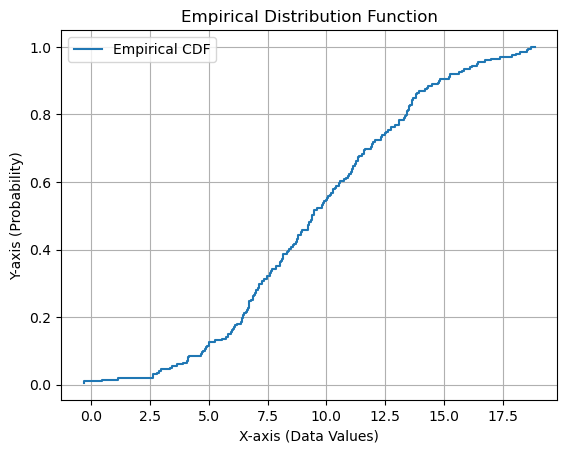

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a sample dataset (replace this with your own data)
data = pd.read_excel(r'C:\Users\Jan Tinio\Desktop\Sample1.xlsx')

# Calculate the empirical distribution function
sorted_data = np.sort(data)
n = len(data)
y = np.arange(1, n + 1) / n

# Plot the empirical distribution function
plt.step(sorted_data, y, label='Empirical CDF')
plt.xlabel('X-axis (Data Values)')
plt.ylabel('Y-axis (Probability)')
plt.title('Empirical Distribution Function')
plt.grid(True)
plt.legend()
plt.show()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a sample dataset (replace this with your own data)
data = pd.read_excel(r'C:\Users\Jan Tinio\Desktop\Sample1.xlsx')

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a sample dataset (replace this with your own data)
#data = pd.read_excel(r'C:\Users\Jan Tinio\Desktop\Sample1.xlsx')
# Sample series of values
values = pd.read_excel(r'C:\Users\Jan Tinio\Desktop\Sample1.xlsx')
fixed_number = 1

# Calculate the indicator function for each value
indicator_values = [1 if value < fixed_number else 0 for value in values]

print(indicator_values)

[1]


In [8]:
# Define the values for T, u, x, v, and lists omega and Y
T = 5  # Replace with your desired value of T
u = 0.5  # Replace with your desired value of u
x = [1.0, 2.0, 3.0]  # Replace with your desired vector for x
v = 2.5  # Replace with your desired value of v
omega = [0.2, 0.3, 0.1, 0.4, 0.5]  # Replace with your list of omega values
Y = [3.0, 2.0, 4.0, 1.0, 2.5]  # Replace with your list of Y values

# Initialize a variable to store the sum
result_sum = 0.0

# Calculate the sum using a loop
for t in range(1, T + 1):
    indicator = 1 if Y[t - 1] <= v else 0
    result_sum += omega[t - 1] * indicator

print(result_sum)


1.2
